Run 1 (n1=1 and n2=1, Early stopping: Epoch 50): 
	Training Loss: 0.6892709741394527 
	Validation Loss: 0.6895967830354958 
	Misclassification Error: 0.39636363636363636

Run 2 (n1=1 and n2=1, Early stopping: Epoch 40): 
	Training Loss: 0.6892674461015283 
	Validation Loss: 0.6895930280571754 
	Misclassification Error: 0.39636363636363636

Run 3 (n1=1 and n2=1, Early stopping: Epoch 103): 
	Training Loss: 0.689265405651643 
	Validation Loss: 0.6895917947578903 
	Misclassification Error: 0.39636363636363636

Run 1 (n1=1 and n2=2, Early stopping: Epoch 113): 
	Training Loss: 0.6892647542842448 
	Validation Loss: 0.6895913637762057 
	Misclassification Error: 0.39636363636363636

Run 2 (n1=1 and n2=2, Early stopping: Epoch 74): 
	Training Loss: 0.6892641231236454 
	Validation Loss: 0.6895912422385956 
	Misclassification Error: 0.39636363636363636

Run 3 (n1=1 and n2=2, Early stopping: Epoch 52): 
	Training Loss: 0.6892720984268356 
	Validation Loss: 0.689594829769509 
	Misclassification Er

Run 1 (n1=3 and n2=4, Early stopping: Epoch 57): 
	Training Loss: 0.6892609750233789 
	Validation Loss: 0.6896125605702875 
	Misclassification Error: 0.39636363636363636

Run 2 (n1=3 and n2=4, Early stopping: Epoch 46): 
	Training Loss: 0.6892673201175905 
	Validation Loss: 0.6895918406794281 
	Misclassification Error: 0.39636363636363636

Run 3 (n1=3 and n2=4, Early stopping: Epoch 35): 
	Training Loss: 0.6892647144051453 
	Validation Loss: 0.6895923305326193 
	Misclassification Error: 0.39636363636363636

Run 1 (n1=3 and n2=5, Early stopping: Epoch 43): 
	Training Loss: 0.6892639734906763 
	Validation Loss: 0.6895930351394162 
	Misclassification Error: 0.39636363636363636

Run 2 (n1=3 and n2=5, Early stopping: Epoch 47): 
	Training Loss: 0.6892624274960649 
	Validation Loss: 0.689614174417179 
	Misclassification Error: 0.39636363636363636

Run 3 (n1=3 and n2=5, Early stopping: Epoch 48): 
	Training Loss: 0.6892678918627524 
	Validation Loss: 0.6895918802993445 
	Misclassification Err

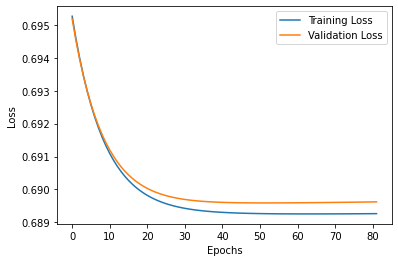

In [11]:
# Hritheekka Chinnakonda, chinnakh, 400292782

# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Neural Network Classifier class
class Neural_Network_Classifier:
    # initializing all necessary values and variables
    def __init__(self):
        self.hidden_L1_weights = None
        self.hidden_L2_weights = None
        self.output_layer_weights = None
        self.learning_rate = 0.005
        self.epochs = 1000
        self.early_stopping_patience = 30
        self.max_hidden_units = 8 # maximum of 8 hidden layers
        
    # initializing the weights for hidden layer 1, hidden layer 2 and the output layer
    def initialize_weights(self, num_input_units, n1, n2):
        
        # initializing limits for weights, based on the number of input units
        hidden_limit = np.sqrt(1 / (num_input_units + n1)) # limits for the hidden layers
        outer_limit = np.sqrt(1 / (n1 + n2)) # limits between 2 hidden layers and output layer
        
        # generate random weights using a uniform distribution within limits set above 
        self.hidden_L1_weights = np.random.uniform(-hidden_limit, hidden_limit, size=(num_input_units, n1))
        self.hidden_L2_weights = np.random.uniform(-outer_limit, outer_limit, size=(n1, n2))
        self.output_layer_weights = np.random.uniform(-outer_limit, outer_limit, size=(n2, 1))
        
    # logistic sigmoid activation function for output and hidden layers
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # derivative of logistic sigmoid activation function for backpropagation 
    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
     # computing cross entropy loss 
    def cross_entropy(self, y, output):
        cross_entropy_loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
        return cross_entropy_loss

    # forward propagation     
    def forward_propagation(self, X):
        
        # computing the outputs using the sigmoid activation function and weights
        hidden_L1_output = self.sigmoid(np.dot(X, self.hidden_L1_weights))
        hidden_L2_output = self.sigmoid(np.dot(hidden_L1_output, self.hidden_L2_weights))
        output = self.sigmoid(np.dot(hidden_L2_output, self.output_layer_weights))
        return hidden_L1_output, hidden_L2_output, output

    # backpropagation 
    def backpropagation(self, X_train, y_train):
        
        # receiving output of each layer from forward propagation function
        hidden_L1_output, hidden_L2_output, output = self.forward_propagation(X_train)

        # calculating error at ouput layer, error-weighted derivative using activation function
        output_error = y_train.reshape(-1, 1) - output
        output_delta = output_error * self.sigmoid_derivative(output)

        # error is backpropagated from the output layer to the hidden layers
        # calculating error at hidden layer 2, error-weighted derivative using activation function
        hidden_L2_error = output_delta.dot(self.output_layer_weights.T)
        hidden_L2_delta = hidden_L2_error * self.sigmoid_derivative(hidden_L2_output)

        # calculating error at hidden layer 1, error-weighted derivative using activation function
        hidden_L1_error = hidden_L2_delta.dot(self.hidden_L2_weights.T)
        hidden_L1_delta = hidden_L1_error * self.sigmoid_derivative(hidden_L1_output)
        
        # updating the weights of each layer, using gradient descent 
        self.output_layer_weights += hidden_L2_output.T.dot(output_delta) * self.learning_rate
        self.hidden_L2_weights += hidden_L1_output.T.dot(hidden_L2_delta) * self.learning_rate
        self.hidden_L1_weights += X_train.T.dot(hidden_L1_delta) * self.learning_rate
    
    def train_classifier(self, X_train, y_train, X_validation, y_validation):
        
        # initializing necessary values and lists
        training_loss_values = []
        validation_loss_values = []
        best_validation_loss = float('inf')
        patience = 0 # tracking the number of epochs with no improvements in validation loss
        optimal_weights = None # best weights

        # iterating through all epochs
        for epoch in range(self.epochs):
            
            #performs back propagation to update weights based on training data
            self.backpropagation(X_train, y_train)
            
            #performs forward propagation to get outputs of each layer
            hidden_L1_output_val, hidden_L2_output_val, output_val = self.forward_propagation(X_validation)

            # calculating training loss and appending it to list
            training_loss = self.cross_entropy(y_train, self.forward_propagation(X_train)[-1])
            training_loss_values.append(training_loss)

            # calculating validation loss and appending it to list
            validation_loss = self.cross_entropy(y_validation, output_val)
            validation_loss_values.append(validation_loss)

            # early stopping, comparing current validation loss with the best stored validation loss
            if validation_loss < best_validation_loss:
                # updates optimal weights
                
                optimal_weights = {
                    'hidden_L1_weights': self.hidden_L1_weights.copy(),
                    'hidden_L2_weights': self.hidden_L2_weights.copy(),
                    'output_layer_weights': self.output_layer_weights.copy()
                }
                
                # updates validation and training loss
                best_validation_loss = validation_loss
                best_training_loss = training_loss
                patience = 0 # reset to 0
                
            else:
                patience += 1 # increment counter
                
                # break loop if condition is met 
                if patience >= self.early_stopping_patience:
                    #print(f'Early stopping: Epoch {epoch}')
                    break

        return epoch, optimal_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values

    # evaluating network performance,calculates misclassification error 
    def test_neural_network(self, X, y, optimal_weights):
        # layer outputs from forward propagation error
        hidden_L1_output, hidden_L2_output, output = self.forward_propagation(X)
        # assigning classes (greater than 0.5 are considered as class 1, less than or equal to 0.5, class 0)
        test_predictions = (output > 0.5).astype(int) # storing class prediction
        misclassification_error = np.mean(test_predictions.flatten() != y) # calculating mean error, boolean array (predictions match/not matching true labels)
        return misclassification_error
    
def main():
    
    #calling Neural Network Classifier
    neural_network = Neural_Network_Classifier()

    # Loading the dataset
    data = pd.read_csv('data_banknote_authentication.txt', header=None, names=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Class'])
    X = data.iloc[:, :4].values
    y = data.iloc[:, 4].values
    
    
    random_seed = 2782 # last 4 digits of student number, random seed
    np.random.seed(random_seed)
    #np.random.seed(neural_network.random_state)

    # splitting training, test and validation set (60%, 20%, 20% respectively)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.4, random_state=random_seed)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_validation = scaler.transform(X_validation)
    X_test = scaler.transform(X_test)

    # initializing and assigning values
    optimized_n1 = None
    optimized_n2 = None
    optimized_weights = None
    optimized_validation_loss = float('inf')
    optimized_misclassification_error = float('inf')

    for n1 in range(1, neural_network.max_hidden_units):
        for n2 in range(1, neural_network.max_hidden_units - n1 + 1):
            #print(f'\nn1={n1} and n2={n2}:')
            optimal_weights_list = []
            best_training_loss_list = []
            best_validation_loss_list = []
            misclassification_error_test_list = []

            for run in range(3):
                neural_network.initialize_weights(X_train.shape[1], n1, n2)

                epoch, optimal_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values = neural_network.train_classifier(X_train, y_train, X_validation, y_validation)
                misclassification_error_test = neural_network.test_neural_network(X_test, y_test, optimal_weights)

                optimal_weights_list.append(optimal_weights)
                best_training_loss_list.append(best_training_loss)
                best_validation_loss_list.append(best_validation_loss)
                misclassification_error_test_list.append(misclassification_error_test)

                print(f'Run {run + 1} (n1={n1} and n2={n2}, Early stopping: Epoch {epoch}): \n\tTraining Loss: {best_training_loss} \n\tValidation Loss: {best_validation_loss} \n\tMisclassification Error: {misclassification_error_test}\n')
                #print(f'Run {run + 1} (n1={n1} and n2={n2}, {best_training_loss}')
            best_index = np.argmin(best_validation_loss_list)
            if best_validation_loss_list[best_index] < optimized_validation_loss:
                optimized_n1 = n1
                optimized_n2 = n2
                optimized_weights = optimal_weights_list[best_index]
                optimized_validation_loss = best_validation_loss_list[best_index]
                optimized_misclassification_error = misclassification_error_test_list[best_index]


    # printing the best model n1, n2, and losses
    print(f'\nBest Network Configuration: n1={optimized_n1}, n2={optimized_n2}')
    print(f'Best Validation Loss: {optimized_validation_loss}')
    print(f'Best Training Loss: {best_training_loss_list[best_index]}')
    print(f'Best Misclassification Error (Test): {optimized_misclassification_error}')

    # getting the final best model errors, using the optimized values
    final_model_misclassification_error_train = neural_network.test_neural_network(X_train, y_train, optimized_weights)
    final_model_misclassification_error_validation = neural_network.test_neural_network(X_validation, y_validation, optimized_weights)
    final_model_misclassification_error_test = neural_network.test_neural_network(X_test, y_test, optimized_weights)

    # final model errors and weights
    print('\nTHE FINAL MODEL (ERRORS and WEIGHTS):')
    print(f'\nTraining Misclassification Error: {final_model_misclassification_error_train}')
    print(f'Validation sMisclassification Error: {final_model_misclassification_error_validation}')
    print(f'Test Misclassification Error: {final_model_misclassification_error_test}')
    print(f'Model weights: {optimized_weights}')
    
    
    # plotting learning curve
    plt.plot(training_loss_values, label='Training Loss')
    plt.plot(validation_loss_values, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()


Train Error using Best Model: 0.46875
Validation Error using Best Model: 0.4583333333333333
Test Error using Best Model: 0.40048543689320387


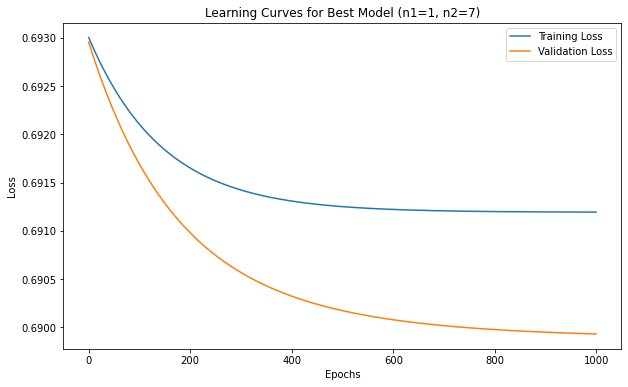

Train Misclassification Error using Best Model: 0.46875
Validation Misclassification Error using Best Model: 0.4583333333333333
Test Misclassification Error using Best Model: 0.40048543689320387
Training and Validation Losses for Each Model:


NameError: name 'training_losses' is not defined

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, n1, n2, output_size):
        self.input_size = input_size
        self.n1 = n1
        self.n2 = n2
        self.output_size = output_size
        self.parameters = self.initialize_parameters()
        self.learning_rate = 0.005

    def initialize_parameters(self):
        parameters = {
            'W1': np.random.randn(self.input_size, self.n1) * 0.01,
            'b1': np.zeros((1, self.n1)),
            'W2': np.random.randn(self.n1, self.n2) * 0.01,
            'b2': np.zeros((1, self.n2)),
            'W3': np.random.randn(self.n2, self.output_size) * 0.01,
            'b3': np.zeros((1, self.output_size))
        }
        return parameters

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward_propagation(self, X):
        Z1 = np.dot(X, self.parameters['W1']) + self.parameters['b1']
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.parameters['W2']) + self.parameters['b2']
        A2 = self.sigmoid(Z2)
        Z3 = np.dot(A2, self.parameters['W3']) + self.parameters['b3']
        A3 = self.sigmoid(Z3)
        return {
            'Z1': Z1,
            'A1': A1,
            'Z2': Z2,
            'A2': A2,
            'Z3': Z3,
            'A3': A3
        }

    def compute_loss(self, A_output, Y):
        m = Y.shape[0]
        loss = -1 / m * np.sum(Y * np.log(A_output) + (1 - Y) * np.log(1 - A_output))
        return loss

    def backward_propagation(self, X, Y, cache):
        m = X.shape[0]
        dZ3 = cache['A3'] - Y
        dW3 = 1 / m * np.dot(cache['A2'].T, dZ3)
        db3 = 1 / m * np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.parameters['W3'].T)
        dZ2 = dA2 * (cache['A2'] * (1 - cache['A2']))
        dW2 = 1 / m * np.dot(cache['A1'].T, dZ2)
        db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.parameters['W2'].T)
        dZ1 = dA1 * (cache['A1'] * (1 - cache['A1']))
        dW1 = 1 / m * np.dot(X.T, dZ1)
        db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)

        gradients = {
            'dW1': dW1,
            'db1': db1,
            'dW2': dW2,
            'db2': db2,
            'dW3': dW3,
            'db3': db3
        }
        return gradients

    def update_parameters(self, gradients, learning_rate):
        self.parameters['W1'] -= learning_rate * gradients['dW1']
        self.parameters['b1'] -= learning_rate * gradients['db1']
        self.parameters['W2'] -= learning_rate * gradients['dW2']
        self.parameters['b2'] -= learning_rate * gradients['db2']
        self.parameters['W3'] -= learning_rate * gradients['dW3']
        self.parameters['b3'] -= learning_rate * gradients['db3']

    def train(self, X_train, y_train, X_val, y_val, learning_rate=0.01, num_epochs=1500, early_stopping_patience=10):
        losses = {'train': [], 'val': []}
        best_val_loss = float('inf')
        patience_count = 0

        for epoch in range(num_epochs):
            # Forward propagation
            cache = self.forward_propagation(X_train)
            train_loss = self.compute_loss(cache['A3'], y_train)
            val_cache = self.forward_propagation(X_val)
            val_loss = self.compute_loss(val_cache['A3'], y_val)
            losses['train'].append(train_loss)
            losses['val'].append(val_loss)

            # Check for early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_count = 0
            else:
                patience_count += 1
                if patience_count == early_stopping_patience:
                    print(f"Stopping early at epoch {epoch}...")
                    break

            # Backward propagation
            gradients = self.backward_propagation(X_train, y_train, cache)

            # Update parameters
            self.update_parameters(gradients, learning_rate)

        return losses

    def predict(self, X):
        cache = self.forward_propagation(X)
        predictions = (cache['A3'] > 0.5).astype(int)
        return predictions

    def evaluate(self, X, y):
        predictions = self.predict(X)
        error = np.mean(predictions != y)
        return error
    
# Load the data from the text file
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',')
    features = data[:, :-1]
    labels = data[:, -1].reshape(-1, 1)
    return features, labels

if __name__ == "__main__":
    # Load data
    features, labels = load_data('data_banknote_authentication.txt')
    
    random_seed = 2782
    learning_rate = 0.005
    num_epochs = 1000
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=random_seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=random_seed)

    
    # standardizing 
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std
    X_val = (X_val - mean) / std
    X_test = (X_test - mean) / std
    
    best_n1 = 0
    best_n2 = 0
    best_val_loss = float('inf')
    best_parameters = None
    best_training_loss = []
    best_validation_loss = []

    # Iterate through different pairs (n1, n2) where n1 + n2 <= 8
    for n1 in range(1, 8):
        for n2 in range(1, 8 - n1 + 1):  # Ensuring n1 + n2 <= 8
            nn = NeuralNetwork(input_size=X_train.shape[1], n1=n1, n2=n2, output_size=1)
            losses = nn.train(X_train, y_train, X_val, y_val, learning_rate, num_epochs, early_stopping_patience=10)

            # Get validation loss for this pair
            val_loss = losses['val'][-1]  # Assuming the last value is the final validation loss

            # Update best parameters if this pair has lower validation loss
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_n1 = n1
                best_n2 = n2
                best_parameters = nn.parameters.copy()
                best_training_loss = losses['train']
                best_validation_loss = losses['val']

    # Using the best parameters found
    nn_best = NeuralNetwork(input_size=X_train.shape[1], n1=best_n1, n2=best_n2, output_size=1)
    nn_best.parameters = best_parameters

    # Evaluate on training, validation, and test sets using the best model
    train_error = nn_best.evaluate(X_train, y_train)
    val_error = nn_best.evaluate(X_val, y_val)
    test_error = nn_best.evaluate(X_test, y_test)

    # Print errors
    print(f"Train Error using Best Model: {train_error}")
    print(f"Validation Error using Best Model: {val_error}")
    print(f"Test Error using Best Model: {test_error}")

    # Plot learning curves for the best model
    plt.figure(figsize=(10, 6))
    plt.plot(best_training_loss, label='Training Loss')
    plt.plot(best_validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"Learning Curves for Best Model (n1={best_n1}, n2={best_n2})")
    plt.show()

    # Calculate misclassification error for the best model
    train_pred = nn_best.predict(X_train)
    val_pred = nn_best.predict(X_val)
    test_pred = nn_best.predict(X_test)

    train_misclassification = np.mean(train_pred != y_train)
    val_misclassification = np.mean(val_pred != y_val)
    test_misclassification = np.mean(test_pred != y_test)

    # Print misclassification errors
    print(f"Train Misclassification Error using Best Model: {train_misclassification}")
    print(f"Validation Misclassification Error using Best Model: {val_misclassification}")
    print(f"Test Misclassification Error using Best Model: {test_misclassification}")

    # Generate a report with training and validation losses
    print("Training and Validation Losses for Each Model:")
    for key, train_loss in training_losses.items():
        val_loss = validation_losses[key][-1]  # Final validation loss
        print(f"Model: {key} - Training Loss: {train_loss[-1]}, Validation Loss: {val_loss}, Misclassification Loss: {test_misclassification}")

    # Additional observations and potential improvements
    print("Observations:")
    print("- The best model achieved the lowest validation loss with n1 =", best_n1, "and n2 =", best_n2)
    print("- The classifier performs reasonably well but might benefit from further hyperparameter tuning or different architectures for improvement.")
   

Train Accuracy: 0.53125
Validation Accuracy: 0.5416666666666666
Test Accuracy: 0.5995145631067961


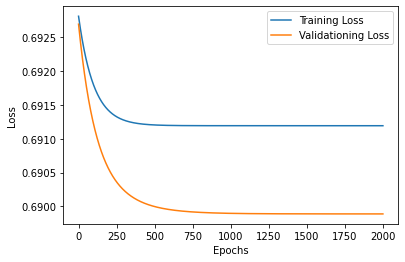

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, n1, n2, output_size):
        self.input_size = input_size
        self.n1 = n1
        self.n2 = n2
        self.output_size = output_size
        
        
        parameters = {
            'WLayer1': np.random.randn(self.input_size, self.n1) * 0.01,
            'bLayer1': np.zeros((1, self.n1)),
            'WLayer2': np.random.randn(self.n1, self.n2) * 0.01,
            'bLayer2': np.zeros((1, self.n2)),
            'WLayer3': np.random.randn(self.n2, self.output_size) * 0.01,
            'bLayer3': np.zeros((1, self.output_size))
        }
        
        self.parameters = parameters


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z*(1-z)


    def forward_propagation(self, X):
        Z1 = np.dot(X, self.parameters['WLayer1']) + self.parameters['bLayer1']
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.parameters['WLayer2']) + self.parameters['bLayer2']
        A2 = self.sigmoid(Z2)
        Z3 = np.dot(A2, self.parameters['WLayer3']) + self.parameters['bLayer3']
        A3 = self.sigmoid(Z3)
        return {
            'ZLayer1': Z1,
            'ALayer1': A1,
            'ZLayer2': Z2,
            'ALayer2': A2,
            'ZLayer3': Z3,
            'ALayer3': A3
        }

    def compute_loss(self, A_output, Y):
        m = Y.shape[0]
        loss = -1 / m * np.sum(Y * np.log(A_output) + (1 - Y) * np.log(1 - A_output))
        return loss

    def backward_propagation(self, X, Y, cache):
        m = Y.shape[0]
        # Calculating derivatives using chain rule and the derivative of sigmoid
        dZ3 = cache['ALayer3'] - Y
        dW3 = 1 / m * np.dot(cache['ALayer2'].T, dZ3)
        db3 = 1 / m * np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.parameters['WLayer3'].T)
        dZ2 = dA2 * self.sigmoid_derivative(cache['ALayer2'])  # Applying sigmoid derivative here
        dW2 = 1 / m * np.dot(cache['ALayer1'].T, dZ2)
        db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.parameters['WLayer2'].T)
        dZ1 = dA1 * self.sigmoid_derivative(cache['ALayer1'])  # Applying sigmoid derivative here
        dW1 = 1 / m * np.dot(X.T, dZ1)
        db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)

        gradients = {
            'dW1': dW1,
            'db1': db1,
            'dW2': dW2,
            'db2': db2,
            'dW3': dW3,
            'db3': db3
        }
        return gradients

    def update_parameters(self, gradients, learning_rate):
        self.parameters['WLayer1'] -= learning_rate * gradients['dW1']
        self.parameters['bLayer1'] -= learning_rate * gradients['db1']
        self.parameters['WLayer2'] -= learning_rate * gradients['dW2']
        self.parameters['bLayer2'] -= learning_rate * gradients['db2']
        self.parameters['WLayer3'] -= learning_rate * gradients['dW3']
        self.parameters['bLayer3'] -= learning_rate * gradients['db3']

    def train(self, X_train, y_train, X_val, y_val, learning_rate=0.01, num_epochs=1000):
        losses = {'train': [], 'val': []}

        for epoch in range(num_epochs):
            # Forward propagation
            cache = self.forward_propagation(X_train)
            train_loss = self.compute_loss(cache['ALayer3'], y_train)
            val_cache = self.forward_propagation(X_val)
            val_loss = self.compute_loss(val_cache['ALayer3'], y_val)
            losses['train'].append(train_loss)
            losses['val'].append(val_loss)

            # Backward propagation
            gradients = self.backward_propagation(X_train, y_train, cache)

            # Update parameters
            self.update_parameters(gradients, learning_rate)

        return losses

    def predict(self, X):
        cache = self.forward_propagation(X)
        predictions = (cache['ALayer3'] > 0.5).astype(int)
        return predictions

    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy


if __name__ == "__main__":
    # Load data
    data = np.loadtxt('data_banknote_authentication.txt', delimiter=',')
    features = data[:, :4]
    labels = data[:, 4].reshape(-1, 1)
    
    random_seed = 2782

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=random_seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=random_seed)
    
    # Instantiate the NeuralNetwork class with appropriate parameters
    nn = NeuralNetwork(input_size=X_train.shape[1], n1=4, n2=4, output_size=1)

    # Train the network and get losses
    losses = nn.train(X_train, y_train, X_val, y_val, learning_rate=0.01, num_epochs=2000)

    # Evaluate the final model
    train_accuracy = nn.evaluate(X_train, y_train)
    val_accuracy = nn.evaluate(X_val, y_val)
    test_accuracy = nn.evaluate(X_test, y_test)

    # Print results and create plots
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    plt.plot(losses['train'], label='Training Loss')
    plt.plot(losses['val'], label='Validationing Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
